# House Prices in King County, USA


## Background and Objective

Background

In this project, I will examine data from home sales in King County, USA to determine what potential sellers can do to increase the selling price of their homes. While there are many factors that come into play when it comes to home values, I will try to find out the main features that drive selling prices using a regression model.

Objective

What features drive the overall selling price of a home in King County?

## Data Understanding

### Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Import datasets

In [3]:
#Nama dataframe kita adalah df yang berisi data dari kc_house_datakaggle.csv.
df = pd.read_csv('kc_house_datakaggle.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
#Melihat 5 baris teratas dari data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
#df['condition'].unique()


Description:
 1.  id = Nomor ID rumah
 2.  date = Tanggal
 3.  price = Harga dari rumah (US$)
 4.  bedrooms = Jumlah kamar tidur
 5.  bathrooms = Jumlah kamar mandi
 6.  sqft_living = Luas ruang tamu dalam satuan sqft
 7.  sqft_lot = Luas ukuran ruang tanah dalam satuan sqft
 8.  floors = Banyaknya lantai
 9.  waterfront = Apakah kawasan rumah berada di tepi daerah yang berbatasan dengan air atau tidak
 10. view =  Objek yang dapat dilihat dari rumah
 11. condition = Seberapa baik kondisinya secara keseluruhan
 12. grade = Grading system dari pemerintah King County US
 13. sqft_above = Luas selain ruang bawah tanah
 14. sqft_basement = Luas ruang bawah tanah
 15. yr_built = Tahun dimana rumah dibangun
 16. yr_renovate = Tahun dimana rumah direnovasi
 17. zipcode = Kode POS
 18. lat = Koordinat lintang
 19. long = Koordinat garis bujur
 20. sqft_living15 = Area ruang tamu pada tahun 2015 (menyiratkan beberapa renovasi)
 21. sqft_lot15 = Area lotSize pada tahun 2015 (menyiratkan beberapa renovasi)

In [7]:
#Mengetahui jumlah kolom dan baris dari data
#Data kita mempunya 21 kolom (features) dengan 21613 baris
df.shape

(21613, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- Pada feature bathrooms terdapat nilai pecahan, maka kita ubah dulu jenis data yang semula float menjadi int.

In [10]:
#Mengubah tipe data dari bathrooms yang semula float menjadi int
df['bathrooms'] = df['bathrooms'].astype('int')
df['floors'] = df['floors'].astype('int')

### Data Cleaning

In [11]:
#Mencari dan menangani missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# Checking duplicated values
df.duplicated().sum()

0

In [13]:
# Data sudah bersih

### Exploratory Data Analysis (EDA)

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
#Disini hanya digunakan beberapa feature saja untuk analisis selanjutnya
df_update = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'price']]
df_update.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,221900.0
1,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,538000.0
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,180000.0
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,604000.0
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,510000.0


In [16]:
df_update.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,5.400881e+05
std,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,7.500000e+04
25%,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,3.219500e+05
50%,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,4.500000e+05
75%,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,7.700000e+06


Observation:

- Pertama, lita lihat apakah nilai min dari setiap kolom masuk akal atau tidak. 
    1. Ada rumah yang tidak memiliki kamar tidur (min=0) cek lebih lanjut
    2. Ada rumah yang tidak memiliki kamar mandi (min=0) cek lebih lanjut
    3. Ada rumah yang tidak memiliki basement (min=0)
    4. Rumah tertua dibangun pada tahun 1900
    5. Harga rumah yang paling murah adalah US$75.000
    
- Kedua, lihat nilai max
    1. Maximum value dari bedrooms 33. Cek lebih lanjut
    2. Ada rumah yang sangat luas jika dibandingkan dengan rata2 luas dari keseluruhan rumah di King County. Max value 'sqft_living' = 13540. Cek lebih lanjut
    3. Ada rumah yang sangat luas parkirannya, yaitu 'sqft_lot' = 1651359. Cek
    4. Ada rumah yang memiliki basement yang sangat luas. 'sqft_basement' = 4820
    5. Ada rumah yang memiliki harga sangat tinggi. Max value dari 'price' = US$7.700.000. Padahal mean dari 'price' = US$ 540.088

In [17]:
df_update[df_update['bedrooms']==0]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
875,0,0,3064,4764,3,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,1095000.0
3119,0,0,1470,979,3,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,380000.0
3467,0,1,1430,1650,3,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,288000.0
4868,0,1,390,5900,1,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,228000.0
6994,0,0,4810,28008,2,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,1295650.0
8477,0,2,2290,8319,2,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,339950.0
8484,0,2,1810,5669,2,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,240000.0
9773,0,0,2460,8049,2,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,355000.0
9854,0,0,1470,4800,2,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,235000.0
12653,0,2,1490,7111,2,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,320000.0


Rumah-rumah yang tidak memiliki kamar tidur ini tidak lazim, karena ukurannya luas. Bahkan luas parkirannya jauh lebih luas dari ukuran luas rumah itu sendiri.

In [18]:
df_update[(df_update['bathrooms']==0)]


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
208,2,0,900,9600,1,0,0,3,6,900,0,1941,0,98166,47.4604,-122.339,180250.0
264,1,0,760,10079,1,1,4,5,5,760,0,1936,0,98070,47.4683,-122.438,369900.0
350,1,0,560,12120,1,0,0,3,4,560,0,1967,0,98014,47.6750,-121.854,299000.0
465,1,0,430,5050,1,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,80000.0
569,2,0,1160,15029,1,0,0,4,6,870,290,1937,0,98014,47.6929,-121.870,405000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19344,2,0,720,5040,1,0,0,3,4,720,0,1949,0,98106,47.5323,-122.347,151000.0
19452,0,0,290,20875,1,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,142000.0
20017,1,0,740,1284,1,0,0,4,6,740,0,1928,0,98107,47.6741,-122.406,290000.0
21610,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,402101.0


Tidak lazim rumah tidak memiliki kamar mandi.

In [19]:
df_update[df_update['bedrooms']==33]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
15870,33,1,1620,6000,1,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,640000.0


Tidak lazim rumah dengan luas 1620 sqft dan harga 640000 memiliki 33 bedrooms

In [20]:
df_update[df_update['sqft_living']==13540]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
12777,7,8,13540,307752,3,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,2280000.0


- Rumah dengan ukuran paling luas ini masuk akal karena jumlah kamar tidur dan kamar mandinya banyak, lantainya ada 3, dan harganya lebih dari 2juta dollar

In [21]:
df_update[df_update['sqft_lot']==1651359]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
1719,4,1,1300,1651359,1,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,700000.0


Luas tanah terlalu luas untuk ukuran ruang tamu rumah dengan luas 1300

In [22]:
#df_update = df_update.drop(index=15870)

In [23]:
#df_update.describe()

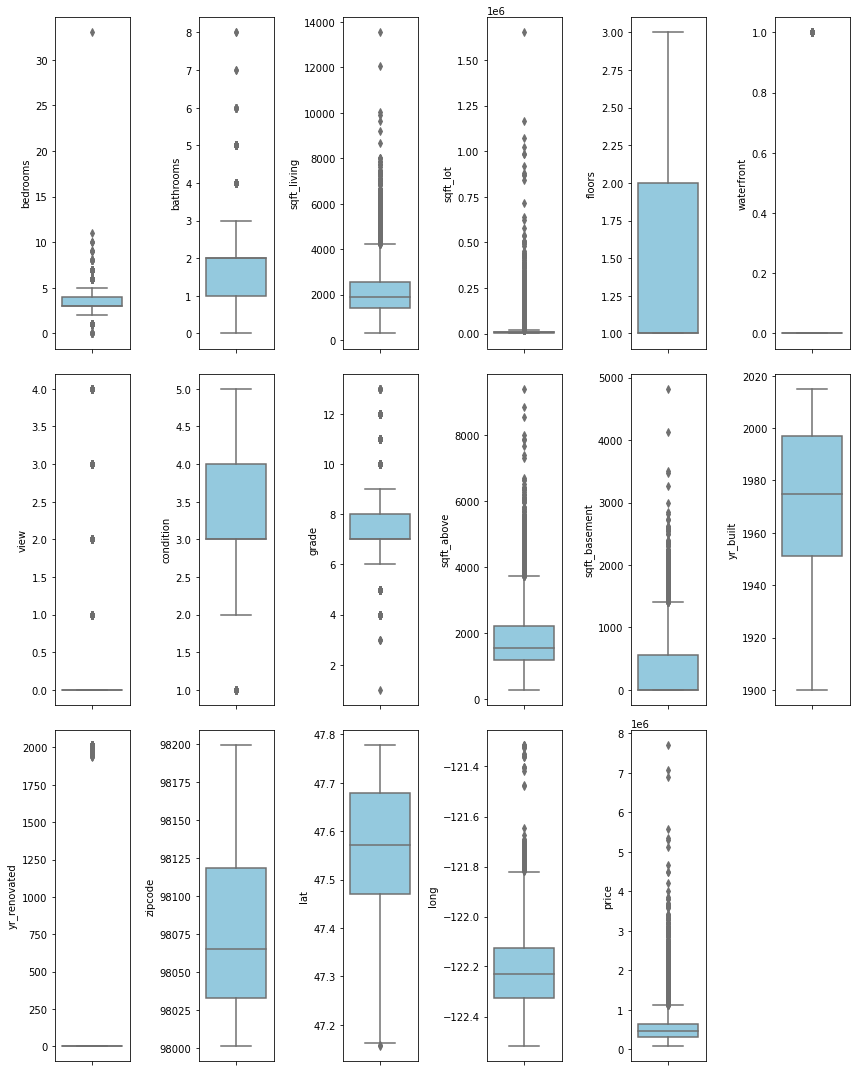

In [24]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'price']
plt.figure(figsize=(12,15))
for i in range(0, len(features)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df_update[features[i]], color='skyblue')
    plt.tight_layout()

- Hanya feature 'floors', 'yr_built', dan 'zipcode' yang tidak memiliki outlier

In [25]:
# Cek outlier

def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [26]:
q1_sqft_lot = df_update['sqft_lot'].quantile(0.25)
q3_sqft_lot = df_update['sqft_lot'].quantile(0.75)
q1_sqft_lot, q3_sqft_lot

(5040.0, 10688.0)

In [27]:
df_update['outlier_sqft_lot'] = check_outlier(data=df_update, column='sqft_lot')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2580\3717009066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_update['outlier_sqft_lot'] = check_outlier(data=df_update, column='sqft_lot')


In [28]:
df_update[df_update['outlier_sqft_lot'] == 'outlier']

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price,outlier_sqft_lot
5,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,1225000.0,outlier
12,3,1,1430,19901,1,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,310000.0,outlier
21,3,2,3050,44867,1,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,2000000.0,outlier
36,4,1,1660,34848,1,0,0,1,5,930,730,1933,0,98052,47.6621,-122.132,550000.0,outlier
41,4,2,4220,24186,1,0,0,3,8,2600,1620,1984,0,98166,47.4450,-122.347,775000.0,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21494,3,4,3850,62726,2,0,0,3,10,3120,730,2013,0,98053,47.6735,-122.058,915000.0,outlier
21506,5,6,7270,130017,2,0,0,3,12,6420,850,2010,0,98027,47.5371,-121.982,2238890.0,outlier
21520,4,4,4920,50621,2,0,0,3,10,4280,640,2012,0,98053,47.6575,-122.006,1408760.0,outlier
21525,4,3,4300,108865,2,0,0,3,11,4300,0,2014,0,98074,47.6258,-122.005,1450000.0,outlier


In [29]:
q1_sqft_living = df_update['sqft_living'].quantile(0.25)
q3_sqft_living = df_update['sqft_living'].quantile(0.75)
q1_sqft_living, q3_sqft_living

(1427.0, 2550.0)

In [30]:
df_update['outlier_sqft_living'] = check_outlier(data=df_update, column='sqft_living')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2580\3569066937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_update['outlier_sqft_living'] = check_outlier(data=df_update, column='sqft_living')


In [31]:
df_update[df_update['outlier_sqft_living'] == 'outlier']

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price,outlier_sqft_lot,outlier_sqft_living
5,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,1225000.0,outlier,outlier
70,5,3,4770,50094,1,0,0,4,11,3070,1700,1973,0,98005,47.6525,-122.160,1040000.0,outlier,outlier
115,3,3,4380,6350,2,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,740500.0,not-outlier,outlier
153,4,3,5180,19850,2,0,3,3,12,3540,1640,2006,0,98006,47.5620,-122.162,2250000.0,outlier,outlier
239,6,2,4410,14034,1,0,2,4,9,2350,2060,1965,0,98003,47.3376,-122.324,472000.0,not-outlier,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21551,5,4,4350,13405,2,0,0,3,11,4350,0,2014,0,98074,47.6018,-122.060,1375000.0,not-outlier,outlier
21561,5,4,4500,8130,2,0,0,3,10,4500,0,2007,0,98059,47.4832,-122.145,750000.0,not-outlier,outlier
21576,5,4,4850,10584,2,1,4,3,10,3540,1310,2007,0,98008,47.5943,-122.110,3567000.0,not-outlier,outlier
21590,4,3,4910,9444,1,0,0,3,11,3110,1800,2007,0,98074,47.6502,-122.066,1222500.0,not-outlier,outlier


Range 'sqft_living' adalah 1427.0 sampai 2550.0. Di luar dari range tersebut dinyatakan sebagai outlier. Jumlah data yang merupakan outlier pada kolom 'sqft_living' adalah sebanyak 572 baris.

In [32]:
q1_price = df_update['price'].quantile(0.25)
q3_price = df_update['price'].quantile(0.75)
q1_price, q3_price

(321950.0, 645000.0)

In [33]:
df_update['outlier_price'] = check_outlier(data=df_update, column='price')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2580\1968575887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_update['outlier_price'] = check_outlier(data=df_update, column='price')


In [34]:
df_update[df_update['outlier_price'] == 'outlier']

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price,outlier_sqft_lot,outlier_sqft_living,outlier_price
5,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,1225000.0,outlier,outlier,outlier
21,3,2,3050,44867,1,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,2000000.0,outlier,not-outlier,outlier
49,3,2,2753,65005,1,1,2,5,9,2165,588,1953,0,98070,47.4041,-122.451,1350000.0,outlier,not-outlier,outlier
69,5,2,3200,20158,1,0,0,3,8,1600,1600,1965,0,98004,47.6303,-122.215,1325000.0,outlier,not-outlier,outlier
125,4,2,2750,17789,1,0,0,3,8,1980,770,1914,1992,98004,47.6141,-122.212,1450000.0,not-outlier,not-outlier,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,4,3,3830,8963,2,0,0,3,10,3120,710,2014,0,98004,47.5990,-122.197,1700000.0,not-outlier,not-outlier,outlier
21576,5,4,4850,10584,2,1,4,3,10,3540,1310,2007,0,98008,47.5943,-122.110,3567000.0,not-outlier,outlier,outlier
21590,4,3,4910,9444,1,0,0,3,11,3110,1800,2007,0,98074,47.6502,-122.066,1222500.0,not-outlier,outlier,outlier
21597,4,3,3410,10125,2,0,0,3,10,3410,0,2007,0,98040,47.5653,-122.223,1575000.0,not-outlier,not-outlier,outlier


Range 'price' adalah 321950.0 sampai 645000.0. Di luar dari range tersebut dinyatakan sebagai outlier. Jumlah data yang merupakan outlier pada kolom 'price' adalah sebanyak 1146 baris.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

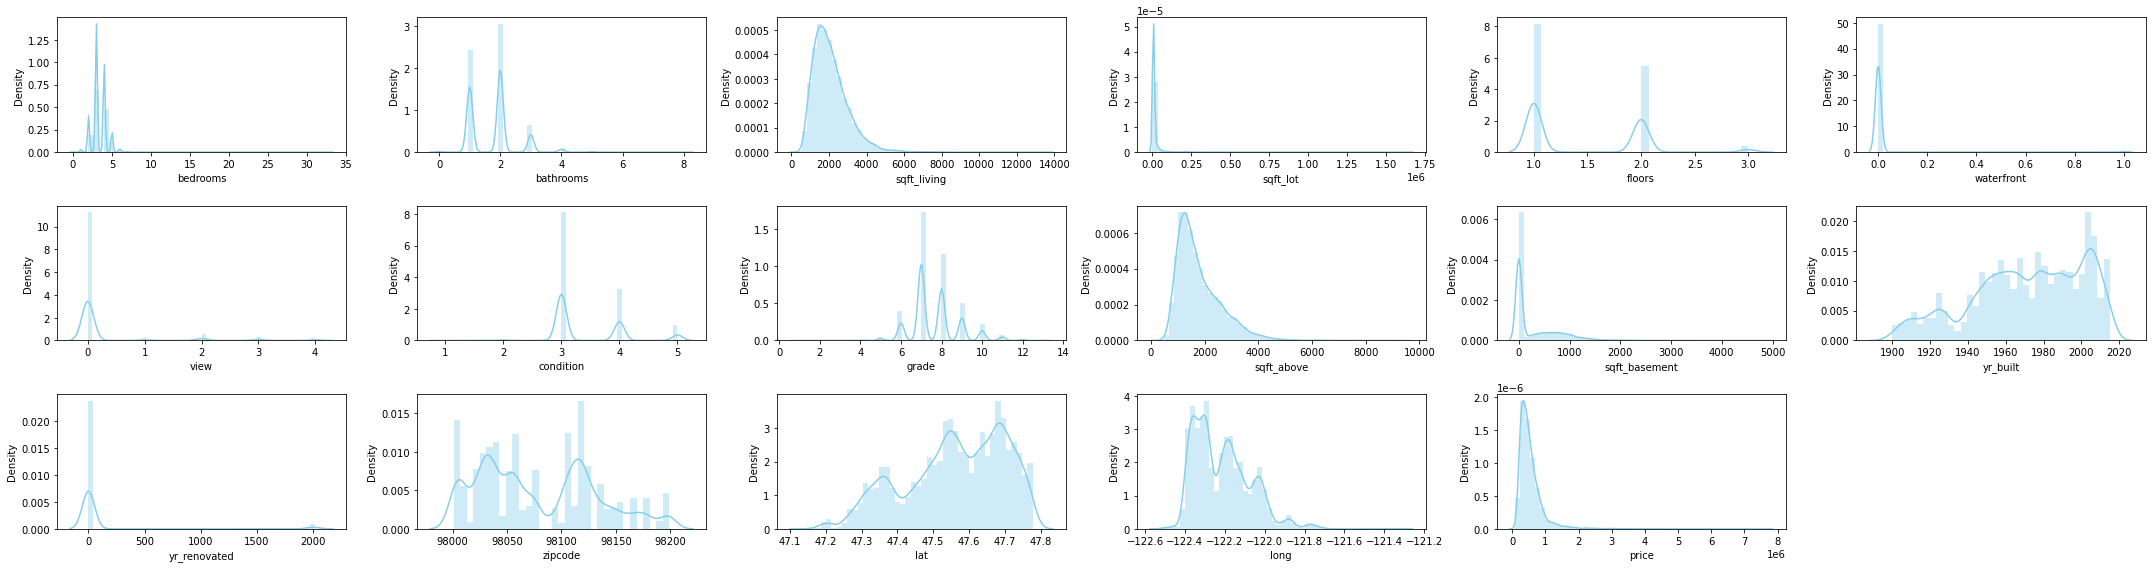

In [35]:
plt.figure(figsize=(30,8))
for i in range(0, len(features)):
    plt.subplot(3, 6, i+1)
    sns.distplot(x=df_update[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Distribution Peak(most houses are):
- 3 bedrooms
- 2 bathrooms
- 1800 in sqft_living
- 100000 in sqft_lot
- 1 floor
- 0 waterfront
- 0 view
- 3 in condition
- 7 in grade
- 1200 in sqft_above
- 100 in sqft_basement
- 2014 in yr_built
- 50 in yr_renovated
- 98110 zipcode
- 47,69 in lat
- -122,3 in long
- 500000 in price

Positively Skewed:
- sqft_living
- sqft_above
- long
- price

Negatively Skewed:
- yr_built
- lat

1. Sebagian besar rumah memiliki 3 bedrooms dan 2 bathrooms dengan luas kurang lebih 1800 square feet
2. Sebagian besar rumah memiliki grade 7
3. Pembangunan rumah di King County dari tahun ke tahun semakin meningkat

<AxesSubplot:>

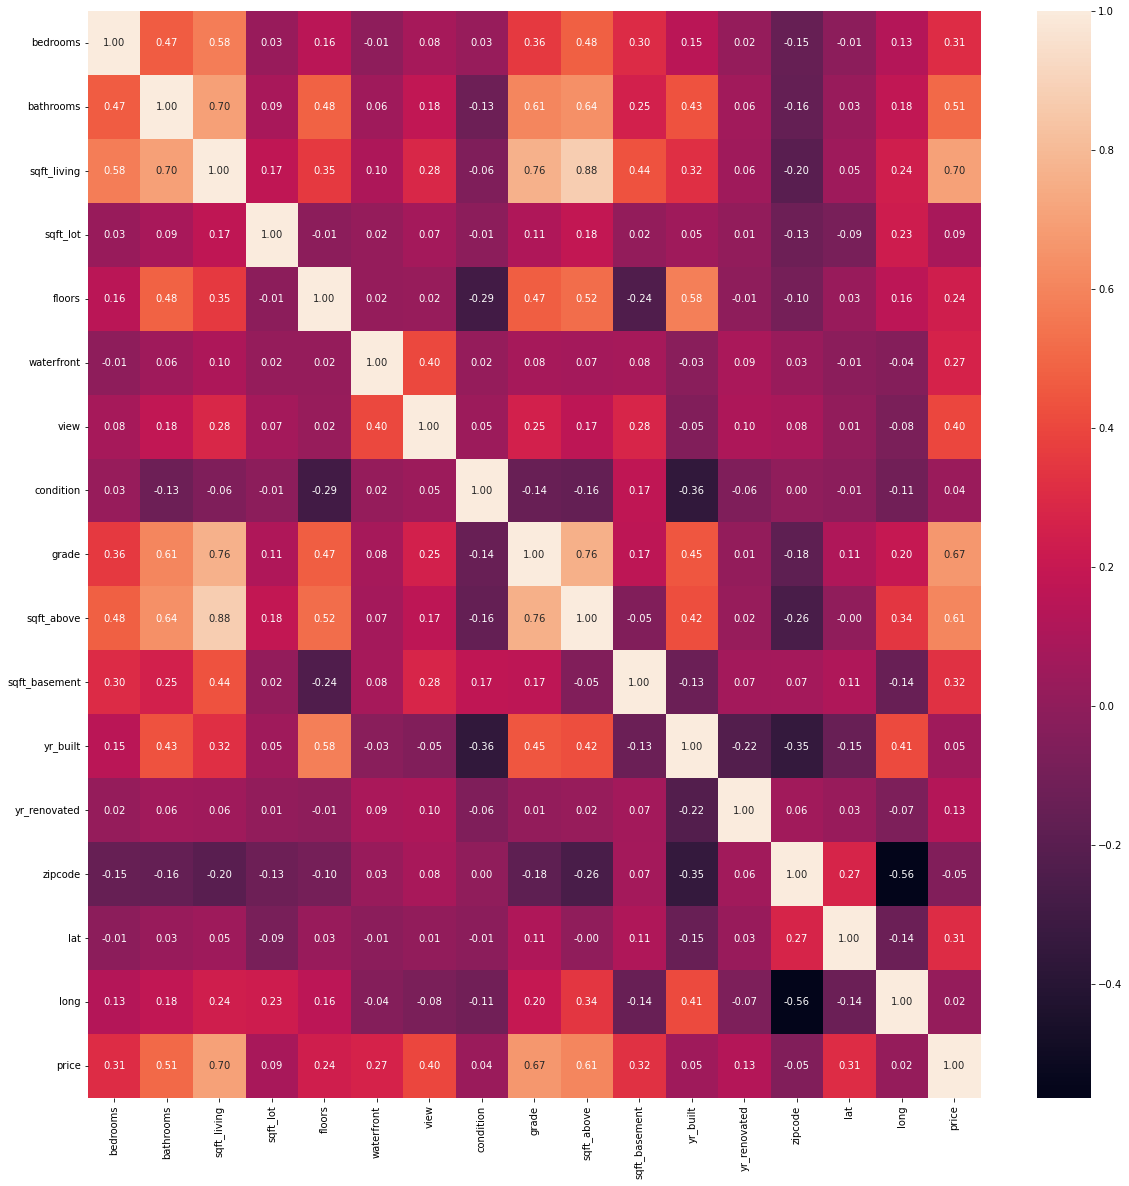

In [36]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable
correlation = df_update.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, fmt='.2f')

- Dari tabel korelasi diatas, dapat dilihat bahwa sqft_living mempunyai hubungan linear positif yang sangat kuat dengan price jika dibandingkan yang lain. Artinya, semakin luas sqft_living maka harga dari rumah akan semakin tinggi.
- Nilai korelasi yr_built hampir mendekati nol yang menandakan bahwa usia rumah tidak mempengaruhi pada harga rumah.

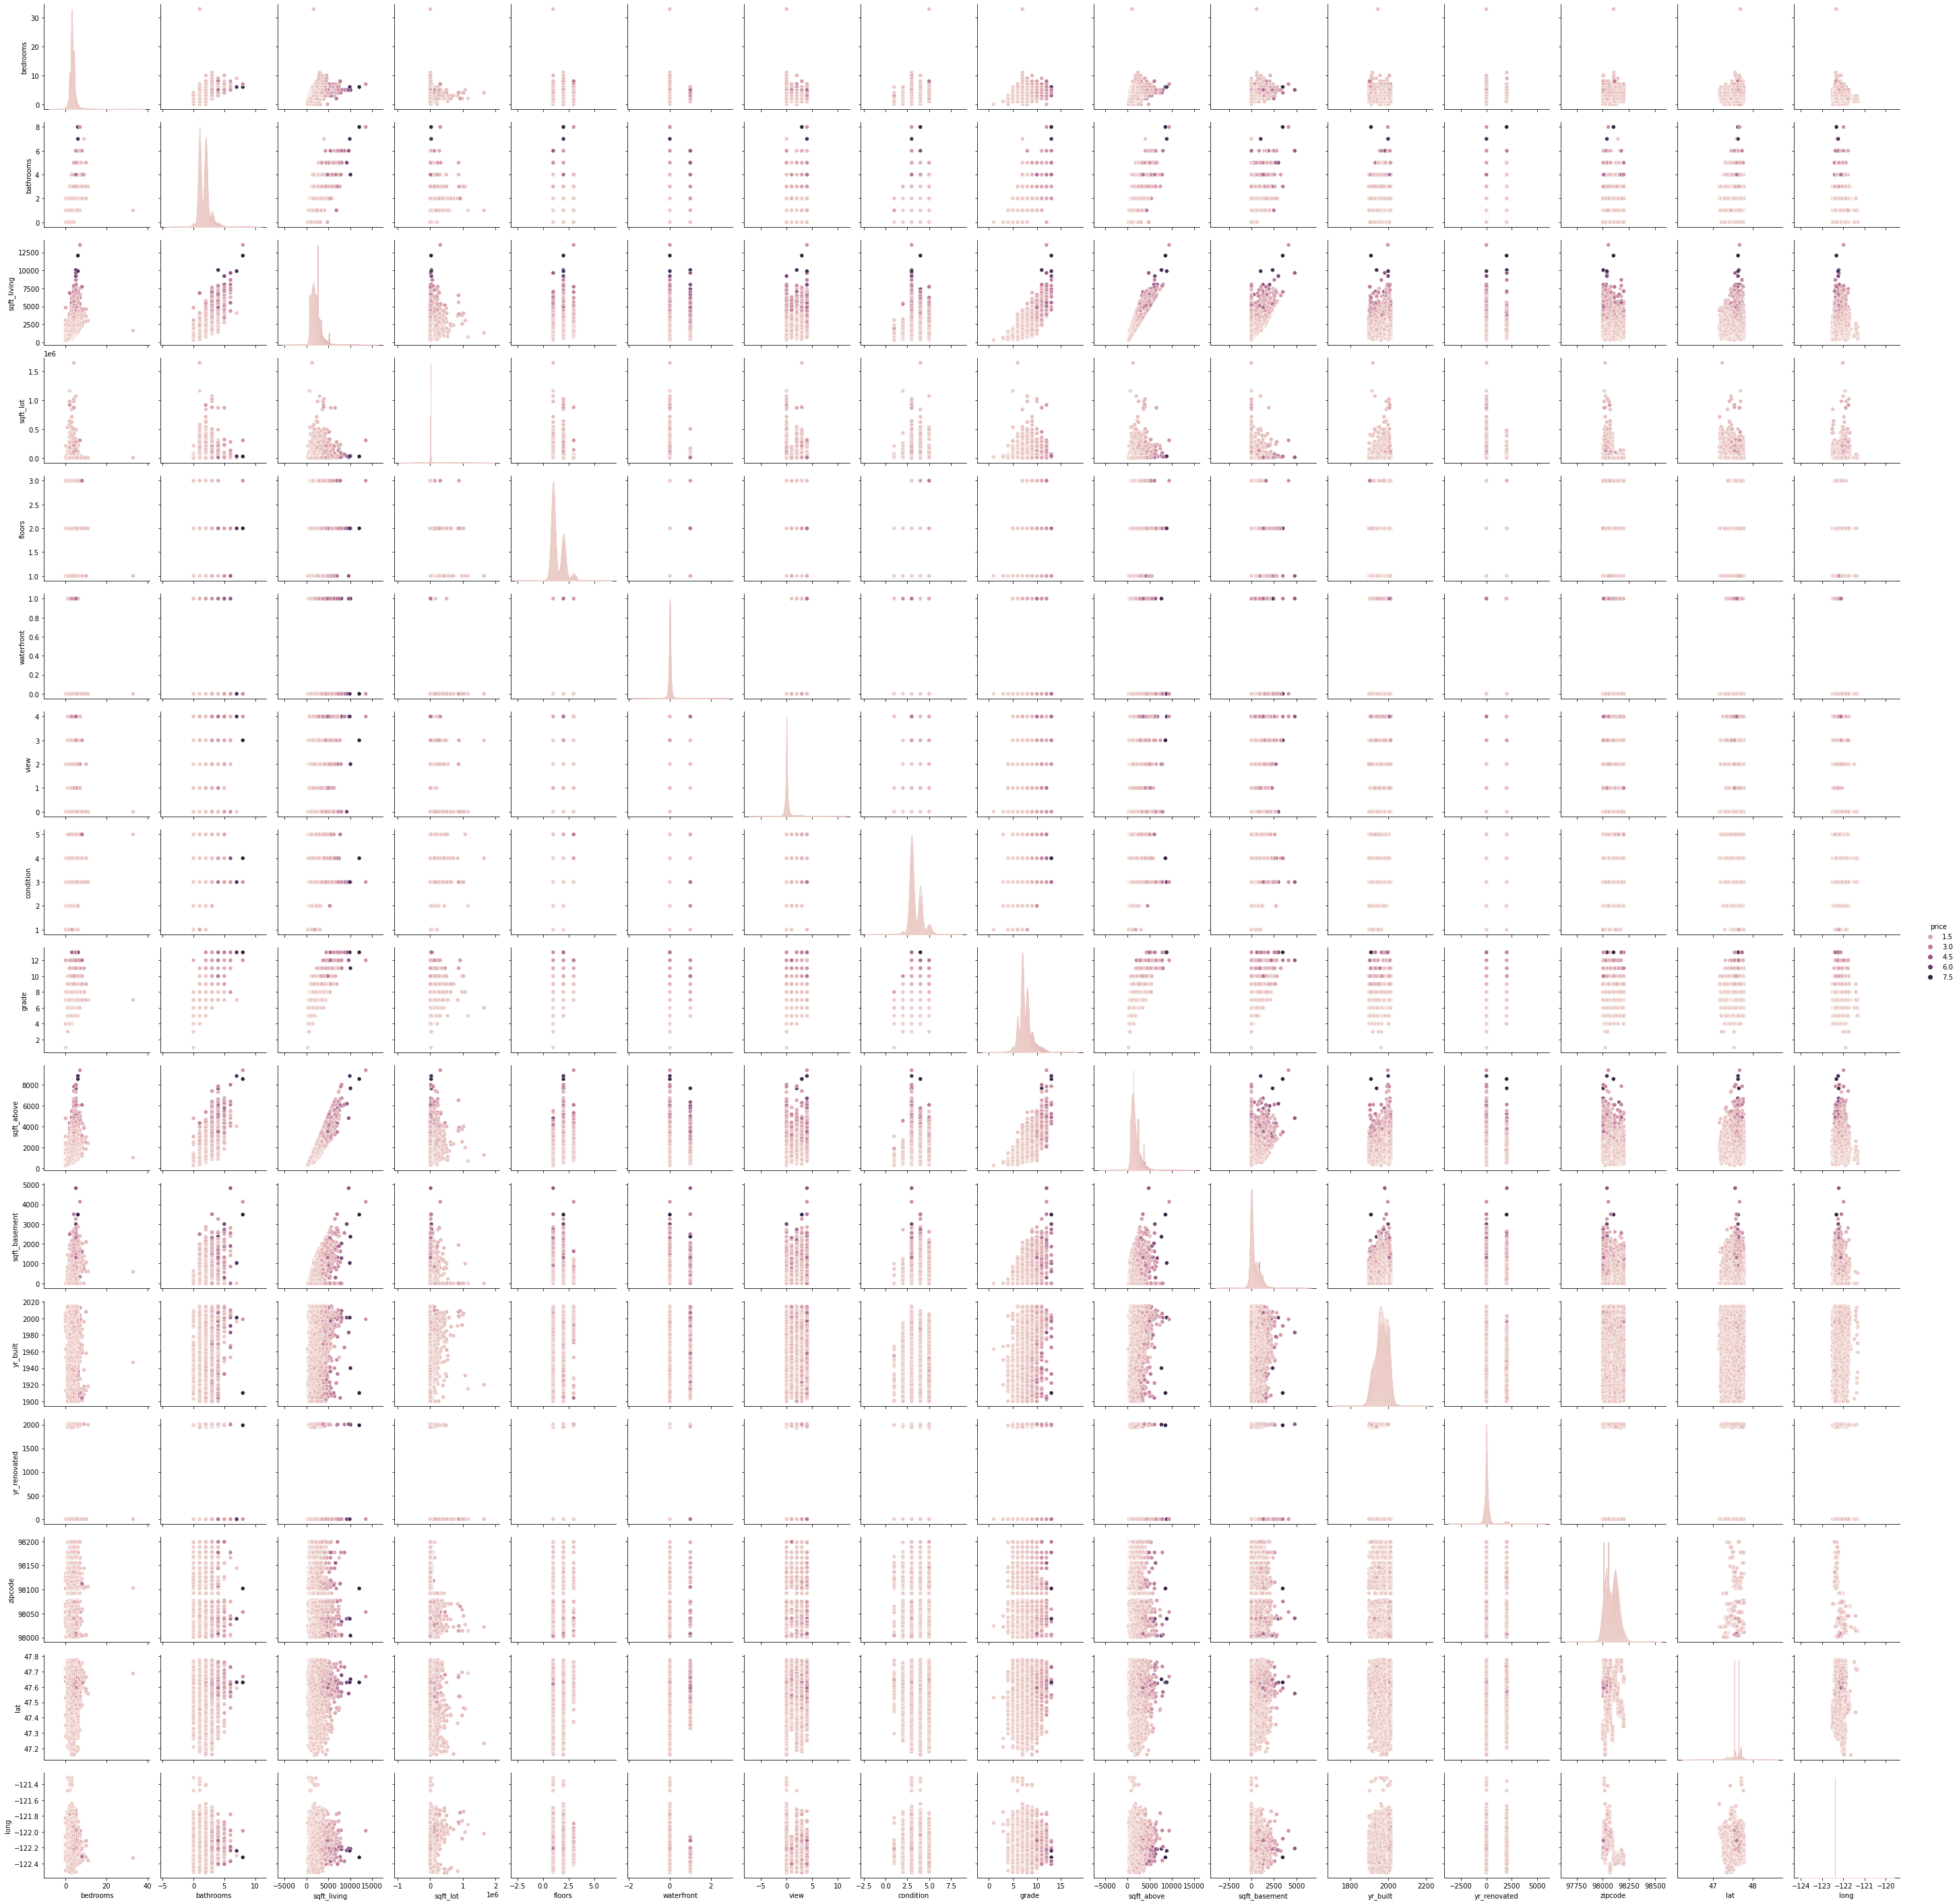

In [36]:
# Pairplot of the data
sns.pairplot(df_update, hue='price')


Kita buat lebih spesifik analisis hubungan antar variabelnya (multivariat analisis) dengan mengambil beberapa kolom/variabel saja

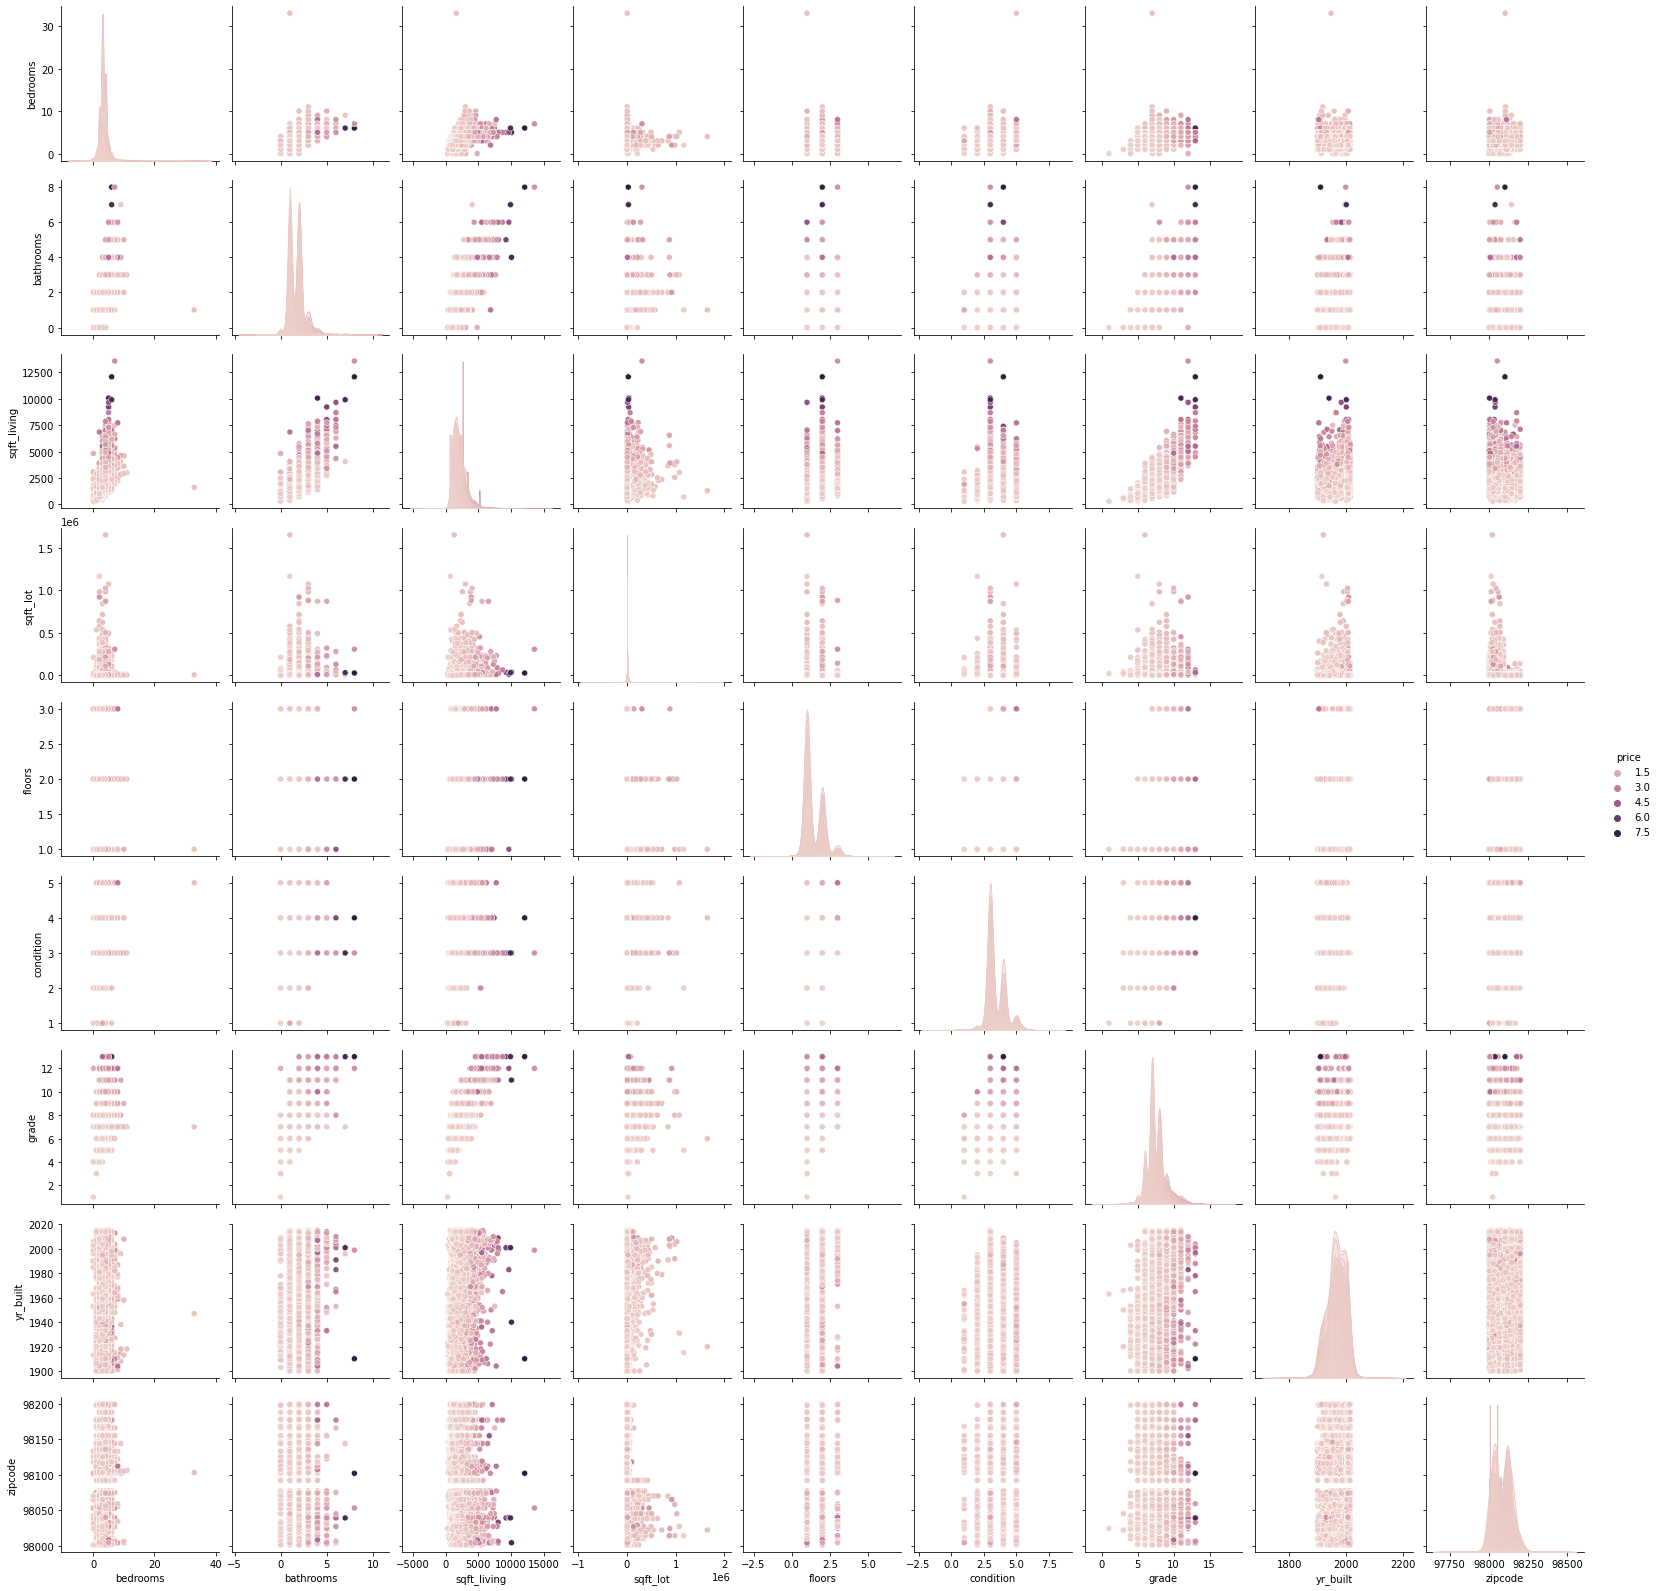

In [37]:
df_pairplot = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'condition', 'grade', 'yr_built', 'zipcode', 'price']]
sns.pairplot(df_pairplot, hue='price')

Dari plot di atas dapat ditarik beberapa insight diantaranya:
1. Semakin banyak jumlah 'bathroom' maka semakin besar luas 'sqft_living'
2. Semakin luas 'sqft_living' maka semakin tinggi 'grade' nya

### Modelling

In [37]:
df_update = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'price']]

df_update.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,221900.0
1,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,538000.0
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,180000.0
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,604000.0
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,510000.0


In [38]:
# split train test
from sklearn.model_selection import train_test_split

feature = df_update.drop(columns='price')
target = df_update[['price']]

feature_df_update_train, feature_df_update_test, target_df_update_train, target_df_update_test = train_test_split(feature, target, test_size=0.20, random_state=42)

### Multicollinearity Study

In [39]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_update_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,bedrooms,1.618777
2,bathrooms,2.400835
3,sqft_living,inf
4,sqft_lot,1.109528
5,floors,2.182946
6,waterfront,1.189608
7,view,1.380317
8,condition,1.243965
9,grade,3.112667
10,sqft_above,inf


Tidak ada features yang memiliki nilai VIF yang tingi

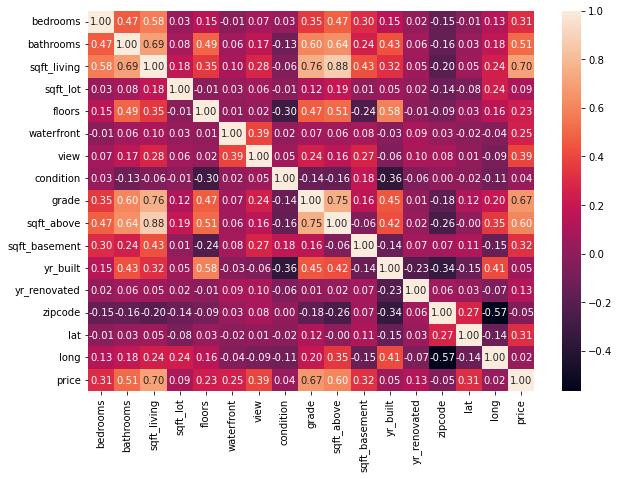

In [40]:
# heatmap correlation
df_update_train = pd.concat([feature_df_update_train, target_df_update_train], axis=1)
corr = df_update_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [41]:
#feature_df_update_train = feature_df_update_train.drop(columns=[''])

## Linear Regression

### Model Training

In [42]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_df_update_train = feature_df_update_train.to_numpy()
y_df_update_train = target_df_update_train.to_numpy()
y_df_update_train = y_df_update_train.reshape(len(y_df_update_train,))

multi_reg.fit(X_df_update_train, y_df_update_train)

LinearRegression()

In [43]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_df_update_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,1.031717e+07
1,bedrooms,-3.390790e+04
2,bathrooms,5.353730e+04
3,sqft_living,1.119357e+02
4,sqft_lot,-8.791053e-02
5,floors,1.236791e+03
6,waterfront,5.599211e+05
7,view,5.562686e+04
8,condition,2.486843e+04
9,grade,9.898975e+04


### Model Diagnostic

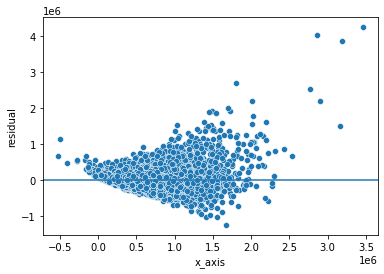

In [44]:
# calculate residuals
y_predict_train = multi_reg.predict(X_df_update_train)
residual = y_df_update_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


- Linear relationship terpenuhi
- Variansi tidak konstan
- Observasinya independen

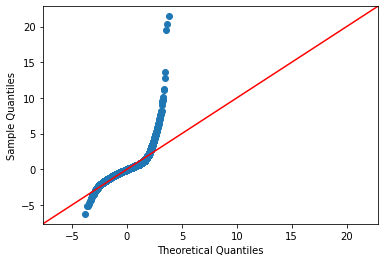

In [45]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

- Normality tidak terpenuhi

### Model Evaluation

In [46]:
from sklearn.metrics import r2_score
r2_score(y_df_update_train, y_predict_train)

0.7004966158133924

69% variabilitas dari price bisa dijelaskan melalui model

#### Training Error

In [47]:
# prepare prediction result on train data
y_predict_train = multi_reg.predict(X_df_update_train)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_update_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_update_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_update_train, y_predict_train)))

RMSE for training data is 197812.28970445108
MAE for training data is 124978.67298910239
MAPE for training data is 0.2548326133876968


#### Testing Error

In [49]:
# prepare prediction result on test data
X_df_update_test = feature_df_update_test.to_numpy()
y_predict_test = multi_reg.predict(X_df_update_test)

# ground truth target
y_df_update_test = target_df_update_test.to_numpy()
y_df_update_test = y_df_update_test.reshape(len(y_df_update_test),)

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_update_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_update_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_update_test, y_predict_test)))

RMSE for testing data is 212666.145170152
MAE for testing data is 127812.48778742774
MAPE for testing data is 0.24935056958098004


- ACCEPTIBLE

## Ridge and Lasso Regression

#### Split data: train-validation-test

In [51]:
# split train test
from sklearn.model_selection import train_test_split

feature = df_update.drop(columns='price')
target = df_update[['price']]

# First splitting: pretrain and test
feature_df_update_pretrain, feature_df_update_test, target_df_update_pretrain, target_df_update_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_df_update_train, feature_df_update_validation, target_df_update_train, target_df_update_validation = train_test_split(feature_df_update_pretrain, target_df_update_pretrain, test_size=0.20, random_state=42)

#### Train Multiple Models
with different alpha (lambda)

In [52]:
from sklearn.linear_model import Ridge

# train the model
X_df_update_train = feature_df_update_train.to_numpy()
y_df_update_train = target_df_update_train.to_numpy()
y_df_update_train = y_df_update_train.reshape(len(y_df_update_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_update_train, y_df_update_train)
ridge_reg_pointone.fit(X_df_update_train, y_df_update_train)
ridge_reg_one.fit(X_df_update_train, y_df_update_train)
ridge_reg_ten.fit(X_df_update_train, y_df_update_train)

Ridge(alpha=10, random_state=42)

#### Find the best model (alpha)
Based on validation set

In [53]:
from sklearn.metrics import mean_squared_error

X_df_update_validation = feature_df_update_validation.to_numpy()
y_df_update_validation = target_df_update_validation.to_numpy()
y_df_update_validation = y_df_update_validation.reshape(len(y_df_update_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_update_validation)
    rmse = np.sqrt(mean_squared_error(y_df_update_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 187804.76882415163
RMSE of Ridge regression model with alpha = 0.1 is 187804.57119924083
RMSE of Ridge regression model with alpha = 1.0 is 187803.36232379288
RMSE of Ridge regression model with alpha = 10 is 187856.48893698805


##### Coefficients

In [54]:
ridge_best = ridge_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_update_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,9.017969e+06
1,bedrooms,-3.451169e+04
2,bathrooms,5.401109e+04
3,sqft_living,1.157721e+02
4,sqft_lot,-1.007797e-01
5,floors,5.227017e+03
6,waterfront,5.584864e+05
7,view,5.391369e+04
8,condition,2.525726e+04
9,grade,9.730094e+04


### Diagnostic Study

In [55]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_df_update_train)

print('R-squared for training data is {}'.format(r2_score(y_df_update_train, y_predict_train)))

R-squared for training data is 0.6996122186316085


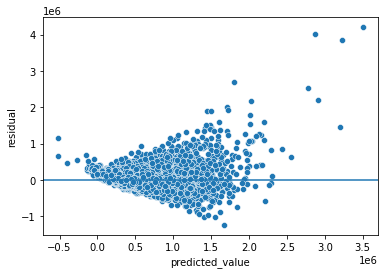

In [56]:
# calculate residuals
residual = y_df_update_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

- Linear relationship terpenuhi
- Variansi tidak konstan
- Observasinya independen

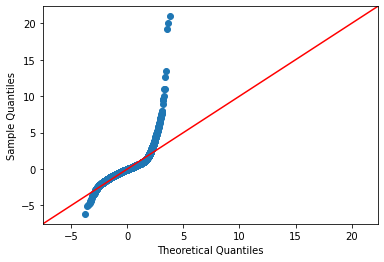

In [57]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

- Normality tidak terpenuhi

### Lasso!

#### Train Multiple Models

In [58]:
from sklearn.linear_model import Lasso

# train the model
X_df_update_train = feature_df_update_train.to_numpy()
y_df_update_train = target_df_update_train.to_numpy()
y_df_update_train = y_df_update_train.reshape(len(y_df_update_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_df_update_train, y_df_update_train)
lasso_reg_pointone.fit(X_df_update_train, y_df_update_train)
lasso_reg_one.fit(X_df_update_train, y_df_update_train)
lasso_reg_ten.fit(X_df_update_train, y_df_update_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.544e+14, tolerance: 1.847e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.544e+14, tolerance: 1.847e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.544e+14, toler

Lasso(alpha=10, random_state=42)

#### Find the best model (alpha)
Based on validation set

In [59]:
from sklearn.metrics import mean_squared_error

X_df_update_validation = feature_df_update_validation.to_numpy()
y_df_update_validation = target_df_update_validation.to_numpy()
y_df_update_validation = y_df_update_validation.reshape(len(y_df_update_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_update_validation)
    rmse = np.sqrt(mean_squared_error(y_df_update_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 187804.79263411774
RMSE of Lasso regression model with alpha = 0.1 is 187804.80141981968
RMSE of Lasso regression model with alpha = 1.0 is 187804.88985759034
RMSE of Lasso regression model with alpha = 10 is 187805.83231049622


##### Coefficients

In [60]:
lasso_best = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_update_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,8.995411e+06
1,bedrooms,-3.446726e+04
2,bathrooms,5.400963e+04
3,sqft_living,2.898171e+02
4,sqft_lot,-9.975278e-02
5,floors,5.100720e+03
6,waterfront,5.648209e+05
7,view,5.367571e+04
8,condition,2.528692e+04
9,grade,9.723014e+04


##### Diagnostic Study

In [61]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_df_update_train)

print('R-squared for training data is {}'.format(r2_score(y_df_update_train, y_predict_train)))

R-squared for training data is 0.6996151304382785


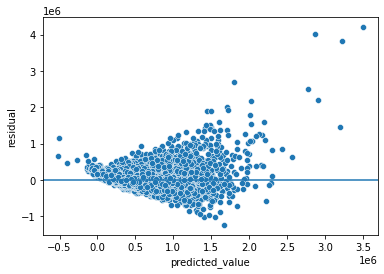

In [62]:
# calculate residuals
residual = y_df_update_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Asumsi:
1. Linear relationship: OK
2. Variance stable: NO
3. Independent residual: OK

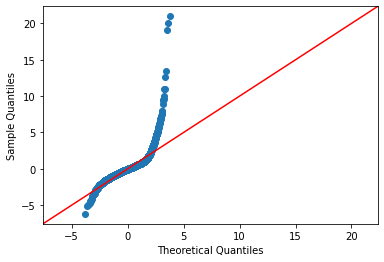

In [63]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

### Model Evaluation
(Ridge)

### Training Error

In [64]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_df_update_train)

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_update_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_update_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_update_train, y_predict_train)))

RMSE for training data is 200297.3090787411
MAE for training data is 125614.75521297831
MAPE for training data is 0.2560558359623681


### Testing Error

In [66]:
# prepare prediction result on test data
X_df_update_test = feature_df_update_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_update_test)

# ground truth target
y_df_update_test = target_df_update_test.to_numpy()
y_df_update_test = y_df_update_test.reshape(len(y_df_update_test),)

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_update_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_update_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_update_test, y_predict_test)))

RMSE for testing data is 212861.99132236102
MAE for testing data is 128098.2112910908
MAPE for testing data is 0.2500406518318759


In [68]:
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error

#mean_absolute_error(y_df_update_test, y_predict_test)
#mean_absolute_percentage_error(y_df_update_test, y_predict_test)

Conclution: ACCEPTIBLE
- Dapat digunakan untuk memodelkan data

### Model Evaluation
(Lasso)

### Training Error

In [69]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_df_update_train)

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_update_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_update_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_update_train, y_predict_train)))

RMSE for training data is 200296.3382861688
MAE for training data is 125639.76765604671
MAPE for training data is 0.2561620924937094


### Testing Error

In [71]:
# prepare prediction result on test data
X_df_update_test = feature_df_update_test.to_numpy()
y_predict_test = lasso_best.predict(X_df_update_test)

# ground truth target
y_df_update_test = target_df_update_test.to_numpy()
y_df_update_test = y_df_update_test.reshape(len(y_df_update_test),)

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_update_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_update_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_update_test, y_predict_test)))

RMSE for testing data is 212828.6975047875
MAE for testing data is 128106.73986765827
MAPE for testing data is 0.2501268393296028


Conclution: ACCEPTIBLE

### Hyperparameter Tuning
- Mengoptimalkan model

In [85]:
df_update = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'price']]

In [86]:
# split train test
from sklearn.model_selection import train_test_split

feature = df_update.drop(columns='price')
target = df_update[['price']]

feature_df_update_train, feature_df_update_test, target_df_update_train, target_df_update_test = train_test_split(feature, target, test_size=0.20, random_state=42)

#### Tuning Ridge

In [87]:
from sklearn.linear_model import Ridge

# define ridge regression model
ridge_reg = Ridge(random_state=42)

# train the model
X_df_update_train = feature_df_update_train.to_numpy()
y_df_update_train = target_df_update_train.to_numpy()
y_df_update_train = y_df_update_train.reshape(len(y_df_update_train),)

In [88]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_df_update_train, y_df_update_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.20354e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.16254e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.96272e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.57887e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: 

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [89]:
# the complete results
pd.DataFrame(ridge_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007156,0.001058,0.001059,3.359451e-04,0.000001,{'alpha': 1e-06},-220708.309565,-204511.550092,-192906.749418,-187320.231025,-184364.838803,-197962.335781,13296.441649,7
1,0.007018,0.000971,0.000794,2.409857e-04,0.00001,{'alpha': 1e-05},-220708.309863,-204511.549792,-192906.749404,-187320.231092,-184364.838683,-197962.335767,13296.441736,6
2,0.008563,0.000826,0.000996,5.046370e-06,0.0001,{'alpha': 0.0001},-220708.312843,-204511.546794,-192906.749263,-187320.231759,-184364.837482,-197962.335628,13296.442610,5
3,0.007749,0.001117,0.000999,6.217196e-07,0.001,{'alpha': 0.001},-220708.342645,-204511.516816,-192906.747855,-187320.238432,-184364.825474,-197962.334244,13296.451349,4
4,0.006688,0.000729,0.000499,4.463295e-04,0.01,{'alpha': 0.01},-220708.640715,-204511.217192,-192906.733869,-187320.305238,-184364.705486,-197962.320500,13296.538725,3
5,0.007450,0.001393,0.000599,3.734277e-04,0.1,{'alpha': 0.1},-220711.626210,-204508.236494,-192906.603841,-187320.981282,-184363.515155,-197962.192597,13297.411812,2
6,0.007971,0.000161,0.000999,1.818245e-06,1,{'alpha': 1},-220741.948307,-204479.953765,-192906.268198,-187328.524749,-184352.550237,-197961.849051,13306.074619,1
7,0.007441,0.001103,0.000800,3.999000e-04,5,{'alpha': 5},-220885.771817,-204384.750831,-192924.124572,-187377.721471,-184322.841372,-197979.042013,13343.038479,8
8,0.007672,0.000967,0.000599,4.886975e-04,10,{'alpha': 10},-221081.677438,-204323.992985,-192983.524151,-187469.103575,-184322.956154,-198036.250861,13385.637735,9
9,0.007622,0.001247,0.001126,2.464502e-04,20,{'alpha': 20},-221505.682830,-204340.849124,-193190.510789,-187722.176549,-184415.630987,-198234.970056,13459.177992,10


In [90]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-197962.335781,7
1,{'alpha': 1e-05},-197962.335767,6
2,{'alpha': 0.0001},-197962.335628,5
3,{'alpha': 0.001},-197962.334244,4
4,{'alpha': 0.01},-197962.320500,3
5,{'alpha': 0.1},-197962.192597,2
6,{'alpha': 1},-197961.849051,1
7,{'alpha': 5},-197979.042013,8
8,{'alpha': 10},-198036.250861,9
9,{'alpha': 20},-198234.970056,10


#### Finding: the best alpha (lambda) is 1

In [91]:
# the best model
ridge_reg_gridcv.best_estimator_

Ridge(alpha=1, random_state=42)

In [92]:
# the coefficients of the best estimator (exclude intercept)
ridge_reg_gridcv.best_estimator_.coef_

array([-3.39415221e+04,  5.35409115e+04,  1.11953228e+02, -8.88331943e-02,
        1.34258463e+03,  5.54571161e+05,  5.58216238e+04,  2.48437744e+04,
        9.90512998e+04,  7.26786551e+01,  3.92749901e+01, -2.65171462e+03,
        1.84724743e+01, -5.74594420e+02,  5.99162859e+05, -1.80649324e+05])

In [93]:
# the intercept of the best estimator
ridge_reg_gridcv.best_estimator_.intercept_

10330858.760168737

In [94]:
# show as a nice dataframe
coef_df = pd.DataFrame({
    'feature':['intercept'] + df_update.drop(columns='price').columns.tolist(),
    'coefficient':[ridge_reg_gridcv.best_estimator_.intercept_] + list(ridge_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,1.033086e+07
1,bedrooms,-3.394152e+04
2,bathrooms,5.354091e+04
3,sqft_living,1.119532e+02
4,sqft_lot,-8.883319e-02
5,floors,1.342585e+03
6,waterfront,5.545712e+05
7,view,5.582162e+04
8,condition,2.484377e+04
9,grade,9.905130e+04


#### Tuning Lasso

In [95]:
from sklearn.linear_model import Ridge

# define ridge regression model
lasso_reg = Lasso(random_state=42)

# train the model
X_df_update_train = feature_df_update_train.to_numpy()
y_df_update_train = target_df_update_train.to_numpy()
y_df_update_train = y_df_update_train.reshape(len(y_df_update_train),)

In [96]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_df_update_train, y_df_update_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.341e+14, tolerance: 1.728e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.431e+14, tolerance: 1.795e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.509e+14, toler

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.556e+14, tolerance: 1.871e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.341e+14, tolerance: 1.728e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.436e+14, toler

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.533e+14, tolerance: 1.834e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.560e+14, tolerance: 1.871e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.101e+14, toler

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [97]:
# the complete results
pd.DataFrame(lasso_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.364783,0.026794,0.000778,0.000300,0.000001,{'alpha': 1e-06},-220708.309532,-204511.550124,-192906.749420,-187320.231018,-184364.838816,-197962.335782,13296.441640,10
1,0.424296,0.016400,0.001272,0.000349,0.00001,{'alpha': 1e-05},-220708.309542,-204511.550114,-192906.749419,-187320.231019,-184364.838812,-197962.335781,13296.441642,9
2,0.442962,0.020778,0.001222,0.000445,0.0001,{'alpha': 0.0001},-220708.309638,-204511.550007,-192906.749417,-187320.231034,-184364.838775,-197962.335774,13296.441670,8
3,0.435990,0.017582,0.001603,0.000491,0.001,{'alpha': 0.001},-220708.310602,-204511.548942,-192906.749391,-187320.231182,-184364.838400,-197962.335703,13296.441950,7
4,0.435508,0.018756,0.001409,0.000483,0.01,{'alpha': 0.01},-220708.320234,-204511.538292,-192906.749134,-187320.232662,-184364.834655,-197962.334995,13296.444745,6
5,0.391313,0.033099,0.001300,0.000599,0.1,{'alpha': 0.1},-220708.416564,-204511.431801,-192906.746565,-187320.247465,-184364.797206,-197962.327920,13296.472698,5
6,0.452825,0.010593,0.001457,0.000457,1,{'alpha': 1},-220709.380533,-204510.367787,-192906.721579,-187320.396264,-184364.423367,-197962.257906,13296.752248,4
7,0.419907,0.042751,0.001143,0.000462,5,{'alpha': 5},-220713.679571,-204505.658600,-192906.625946,-187321.271887,-184362.776093,-197962.002420,13297.963631,3
8,0.418465,0.044686,0.001115,0.000517,10,{'alpha': 10},-220719.087193,-204499.817494,-192906.541800,-187322.490386,-184360.749682,-197961.737311,13299.465458,2
9,0.447984,0.019530,0.001602,0.000490,20,{'alpha': 20},-220730.015170,-204488.286556,-192906.491492,-187325.046250,-184356.805801,-197961.329054,13302.474877,1


In [98]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(lasso_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-197962.335782,10
1,{'alpha': 1e-05},-197962.335781,9
2,{'alpha': 0.0001},-197962.335774,8
3,{'alpha': 0.001},-197962.335703,7
4,{'alpha': 0.01},-197962.334995,6
5,{'alpha': 0.1},-197962.327920,5
6,{'alpha': 1},-197962.257906,4
7,{'alpha': 5},-197962.002420,3
8,{'alpha': 10},-197961.737311,2
9,{'alpha': 20},-197961.329054,1


#### Finding: the best alpha (lambda) is 20

In [99]:
# the best model
lasso_reg_gridcv.best_estimator_

Lasso(alpha=20, random_state=42)

In [100]:
# the coefficients of the best estimator (exclude intercept)
lasso_reg_gridcv.best_estimator_.coef_

array([-3.38893796e+04,  5.34910568e+04,  2.87576996e+02, -8.91097555e-02,
        1.22574542e+03,  5.56768203e+05,  5.57229592e+04,  2.47963879e+04,
        9.90307900e+04, -1.02935356e+02, -1.36354046e+02, -2.65065964e+03,
        1.84687952e+01, -5.74063778e+02,  6.00076537e+05, -1.79927470e+05])

In [101]:
# the intercept of the best estimator
lasso_reg_gridcv.best_estimator_.intercept_

10321896.391889555

In [102]:
# show as a nice dataframe
coef_df = pd.DataFrame({
    'feature':['intercept'] + df_update.drop(columns='price').columns.tolist(),
    'coefficient':[lasso_reg_gridcv.best_estimator_.intercept_] + list(lasso_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,1.032190e+07
1,bedrooms,-3.388938e+04
2,bathrooms,5.349106e+04
3,sqft_living,2.875770e+02
4,sqft_lot,-8.910976e-02
5,floors,1.225745e+03
6,waterfront,5.567682e+05
7,view,5.572296e+04
8,condition,2.479639e+04
9,grade,9.903079e+04
